<a href="https://colab.research.google.com/github/sahith-krishna19/EDA/blob/main/Module_6_Complete_Dimensionality_Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 6: Dimensionality Reduction

## Student Details
**Name**: Sahith Krishna
**Registration Number**: 21BDS0078

### Load Dataset and Preprocess

In [1]:

import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the PhD Publications dataset
url = 'https://github.com/sahith-krishna19/EDA/blob/main/PhDPublications.csv?raw=true'
data = pd.read_csv(url)

# Selecting numeric columns for dimensionality reduction
numeric_data = data[['articles', 'kids', 'prestige', 'mentor']]

# Scaling features
scaler = StandardScaler()
X = scaler.fit_transform(numeric_data)


## 6.1 Principal Component Analysis (PCA)

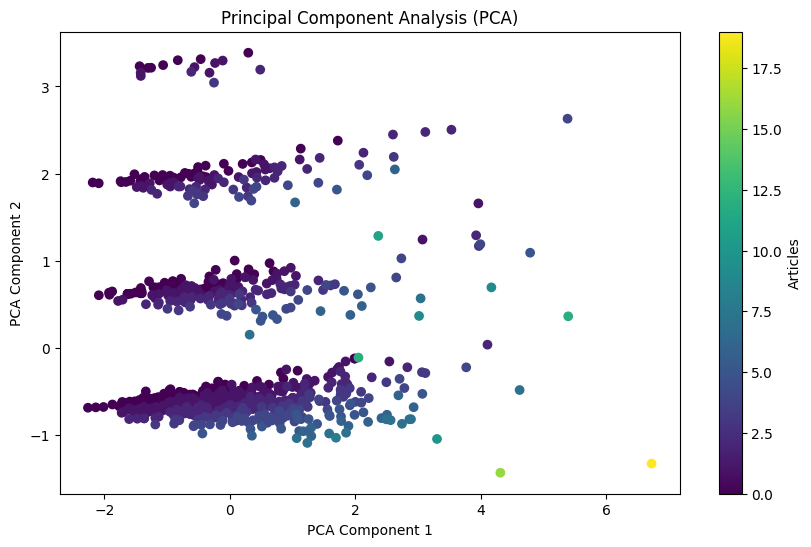

In [2]:

from sklearn.decomposition import PCA

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Visualize PCA results
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['articles'], cmap='viridis')
plt.title("Principal Component Analysis (PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Articles")
plt.show()


## 6.2 Singular Value Decomposition (SVD)

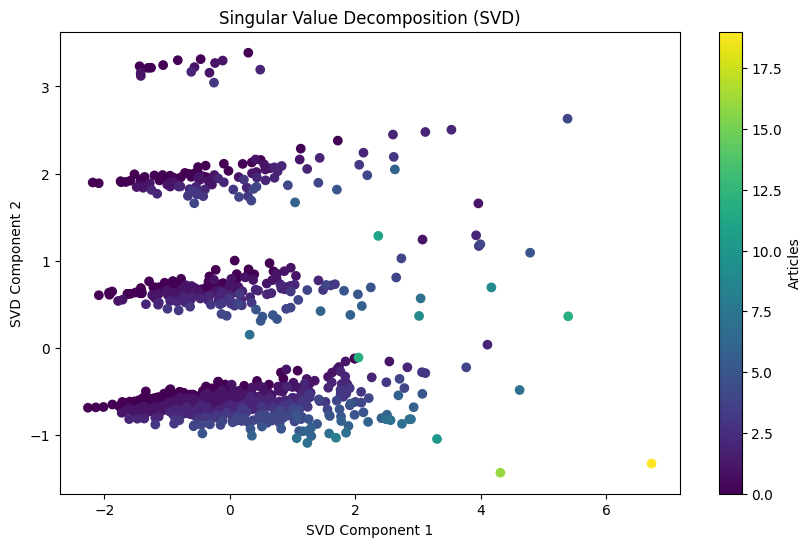

In [3]:

from sklearn.decomposition import TruncatedSVD

# Perform SVD
svd = TruncatedSVD(n_components=2)
X_svd = svd.fit_transform(X)

# Visualize SVD results
plt.figure(figsize=(10, 6))
plt.scatter(X_svd[:, 0], X_svd[:, 1], c=data['articles'], cmap='viridis')
plt.title("Singular Value Decomposition (SVD)")
plt.xlabel("SVD Component 1")
plt.ylabel("SVD Component 2")
plt.colorbar(label="Articles")
plt.show()


## 6.3 Factor Analysis (FA)

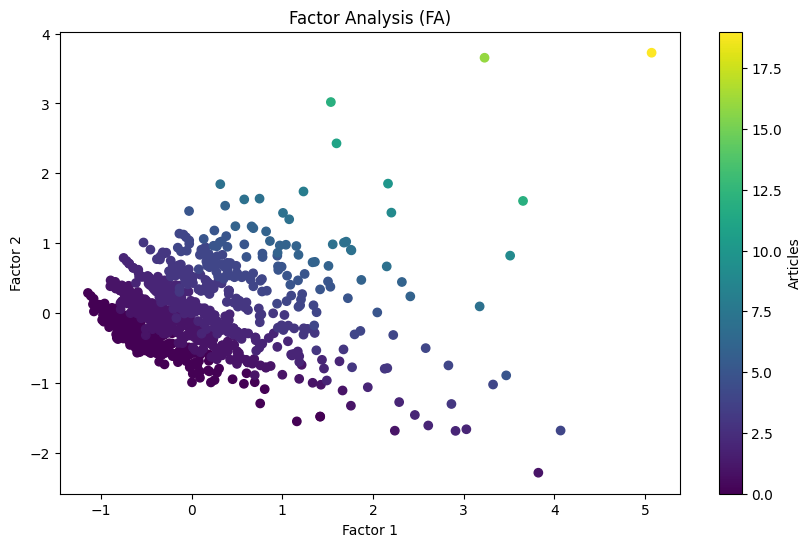

In [4]:

from sklearn.decomposition import FactorAnalysis

# Perform Factor Analysis
fa = FactorAnalysis(n_components=2, random_state=42)
X_fa = fa.fit_transform(X)

# Visualize Factor Analysis results
plt.figure(figsize=(10, 6))
plt.scatter(X_fa[:, 0], X_fa[:, 1], c=data['articles'], cmap='viridis')
plt.title("Factor Analysis (FA)")
plt.xlabel("Factor 1")
plt.ylabel("Factor 2")
plt.colorbar(label="Articles")
plt.show()


## 6.4 Non-Linear Methods

### 6.4.1 Multidimensional Scaling (MDS)

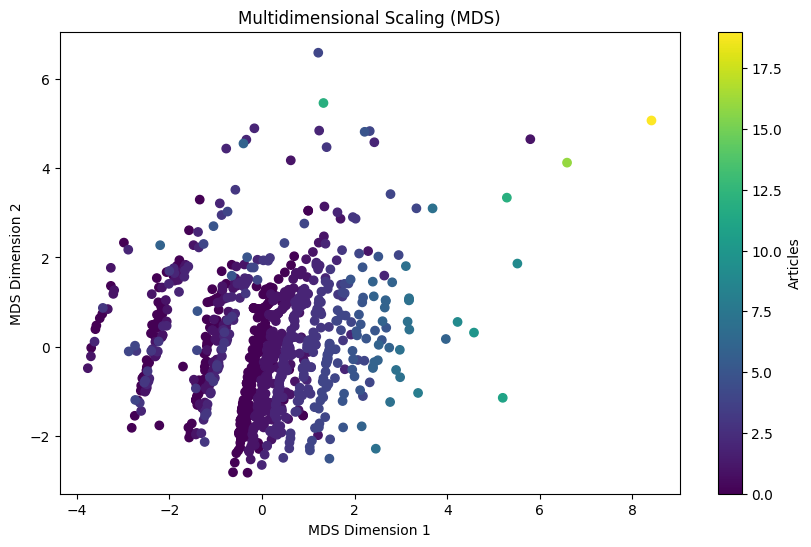

In [5]:

from sklearn.manifold import MDS

# Perform MDS
mds = MDS(n_components=2, random_state=42)
X_mds = mds.fit_transform(X)

# Visualize MDS results
plt.figure(figsize=(10, 6))
plt.scatter(X_mds[:, 0], X_mds[:, 1], c=data['articles'], cmap='viridis')
plt.title("Multidimensional Scaling (MDS)")
plt.xlabel("MDS Dimension 1")
plt.ylabel("MDS Dimension 2")
plt.colorbar(label="Articles")
plt.show()


### 6.4.2 Manifold Learning (t-SNE)

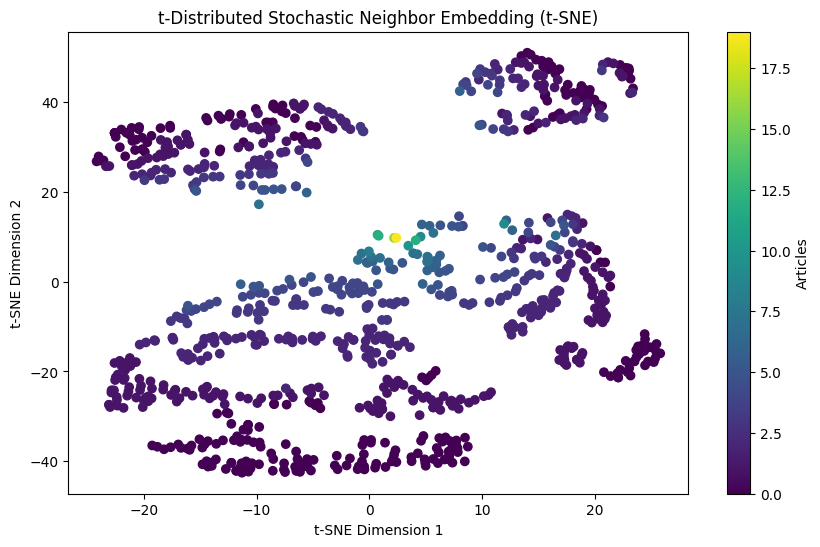

In [6]:

from sklearn.manifold import TSNE

# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Visualize t-SNE results
plt.figure(figsize=(10, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=data['articles'], cmap='viridis')
plt.title("t-Distributed Stochastic Neighbor Embedding (t-SNE)")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.colorbar(label="Articles")
plt.show()


### 6.4.3 Self-Organizing Maps (SOM)

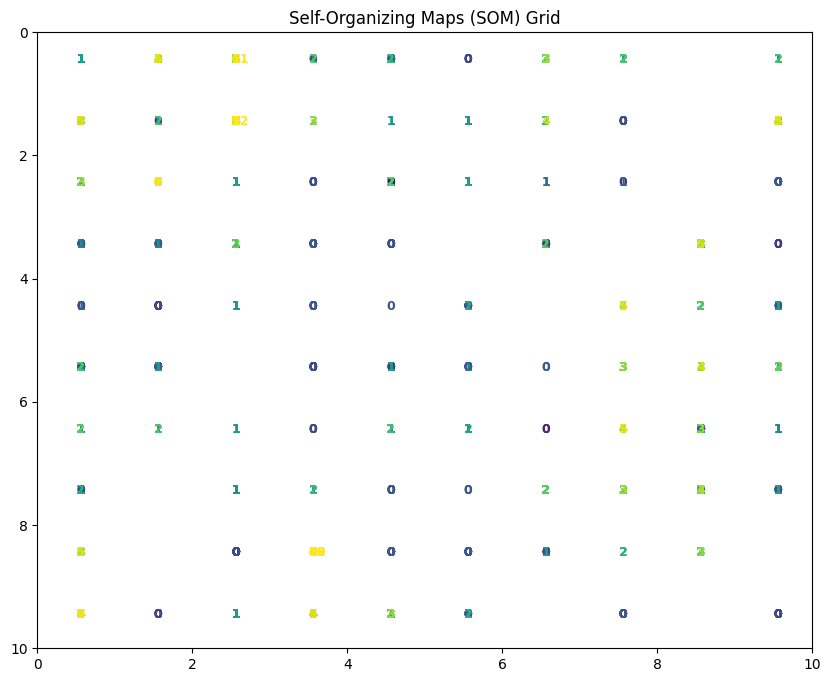

In [11]:
# Import necessary libraries
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt

# Define the dimensions of the SOM grid
som_grid_rows, som_grid_cols = 10, 10  # Adjust grid size as needed

# Initialize and train the SOM
som = MiniSom(x=som_grid_rows, y=som_grid_cols, input_len=X.shape[1], sigma=1.0, learning_rate=0.5)
som.random_weights_init(X)
som.train_random(X, num_iteration=100)

# Visualize the SOM grid
plt.figure(figsize=(10, 8))
for i, x in enumerate(X):
    # Get the winning neuron (best matching unit) for each data point
    winning_neuron = som.winner(x)
    # Plot each data point according to its winning neuron position
    plt.text(winning_neuron[0] + 0.5, winning_neuron[1] + 0.5, str(data['articles'].iloc[i]),
             color=plt.cm.viridis(i / len(X)), fontdict={'weight': 'bold', 'size': 9})

plt.title("Self-Organizing Maps (SOM) Grid")
plt.xlim([0, som_grid_rows])
plt.ylim([0, som_grid_cols])
plt.gca().invert_yaxis()  # Invert y-axis for better alignment
plt.show()
